#### NOTE: More notes to be transferred later.

### Variance:
- The `expected value` of the square of the distance of the `random variable` from the `mean`. Given by:
$$
\begin{align}
\text{Var}(X) = \mathbb{E}[(X - \mathbb{E}(X))^2] = \sum_{x} (x - \mathbb{E}(X))^2 f(x), \enspace &\text{if} f(x) \text{ is PMF} \\
\text{Var}(X) = \mathbb{E}[(X - \mathbb{E}(X))^2] = \int_x (x - \mathbb{E}(X))^2 f(x) dx,\enspace &\text{if} f(x) \text{ is PDF}
\end{align}
$$
Variance is the measure of dispersion and uncertainty present within a distribution. From a *stochastic finance* perspective, variance is the indicator of risk present in an asset. It can be computed using a probability distribution and the *Var(x)* expression above. Computation is essentially a litmus test for investors as a higher resulting variance, either from returns or directly from asset values, indicates ups and downs that can lead to potential losses. This is treated like a fundamental theorem in stochastic finance.

### Moments:
Generic version of *expectation* and *variance* as its taken for a random variable raised to a specific power and wrt a base, as shown below:
$$
\begin{align}
m_r^c = \mathbb{E}[(X-c)^r] = \sum_{x} (x - c)^r f(x), \enspace &\text{if} f(x) \text{ is PMF} \\
m_r^c = \mathbb{E}[(X-c)^r] = \int_x (x - c)^r f(x) dx,\enspace &\text{if} f(x) \text{ is PDF}
\end{align}
$$
Where $c$ is the base and $r$ is the power and $m_r^c$ is known as the *rth* order moment about $c$. Any moment with base zero, i.e. $c = 0$, is known as a *raw moment* denoted by $m_r$, whereas the same with base mean $(c = \mathbb{E}(X))$ is the *central moment* denoted by $\mu_r$.

The *mean* and *variance* are nothing but the *first-order raw moment* and *second-order central moment*, i.e., $m_1$ and $\mu_2$, respectively.
Momdents indicate how the mass of the distribution is spread across. Higher moemnts (higher values for $r$) give high values in the distribution whereas $m_1$ is the center of mass. Theyre considered as junction points of the distribution exhibiting certain statistical properties. One informal way of comparing two probability distributions is by comparing their moments of several orders, especially for PDFs. You can try matching certain junction points to check the equality of two distributions instead of comparing the whole distribution pointwise; hence, moments have a role to play. Moments can be used to model security prices with `jumps`.

### Moment Approximation:


### Poisson Distribution:
PMF of a Poisson distribution is:
$$
f_\text{poisson}(x) = \frac{\lambda^{x}}{x!}e^{-\lambda}, \enspace \lambda > 0, \enspace x = 0, 1, 2 \ldots
$$
where $\lambda$ is the parameter of the Poisson PMF.

In [1]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import uniform

import visualization as vs3


In [ ]:
from scipy.stats import beta, binom

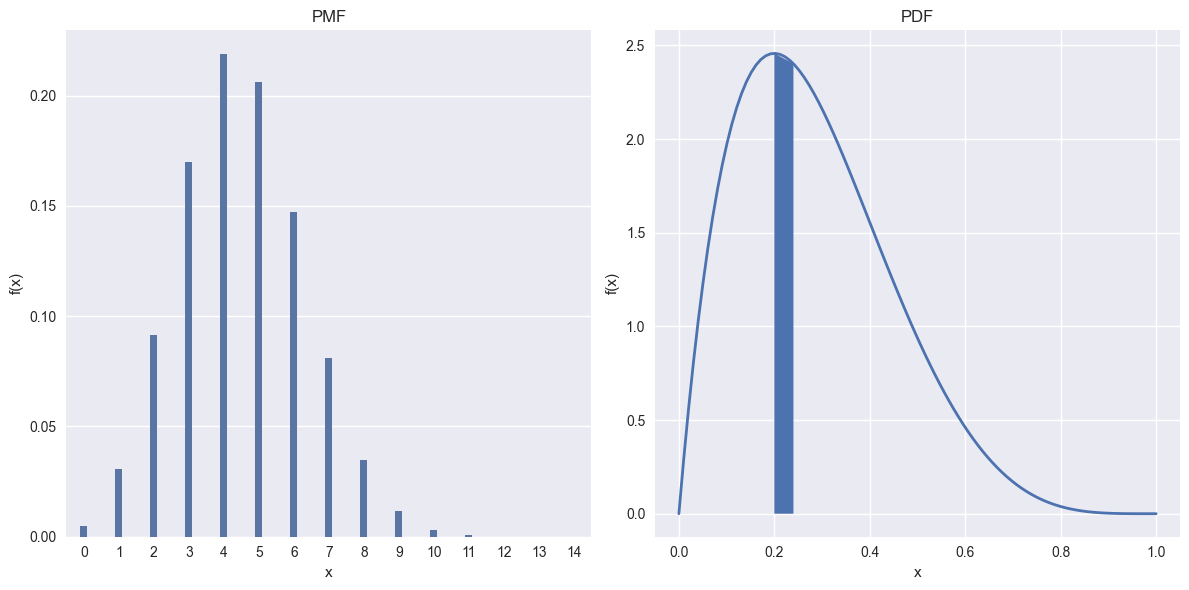

In [8]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

x_pmf = np.arange(0, 15)
# sns.barplot(ax=ax[0], x=x_pmf, y=binom(15, 0.3).pmf(x_pmf), width=0.2)
sns.barplot(ax=ax[0], x=x_pmf, y=binom(15, 0.3).pmf(x_pmf), width=0.2)
ax[0].set(title="PMF", xlabel="x", ylabel="f(x)")

x_pdf = np.linspace(start=0, stop=1, num=100)
beta_rv = beta(a=2, b=5)
sns.lineplot(ax=ax[1], x=x_pdf, y=beta_rv.pdf(x=x_pdf), lw=2)
x_fill = [0.2, 0.24]

ax[1].fill_between(x=x_fill, y1=beta_rv.pdf(x=x_fill))
ax[1].set(title="PDF", xlabel="x", ylabel="f(x)")

fig.tight_layout()
plt.show()

In [4]:
def poisson_distribution():
    lamdas = [1, 4, 10, 40]

    x = np.arange(0, 15)

    # grab probabilities of input x for different lambda values
    prob_x = {
        lamda: (
            # pmf returns the probability of input x from poisson PMF
            poisson(lamda).pmf(x),
        )
        for lamda in lamdas
    }
    # plotting x vs probabilities for different \lambda values
    vs3.poisson_plot(prob_x)

def gaussian_distribution():
    params_mu_sigma = [(86, 90), (-6, 70), (43, 40), (-10, 19)]
    x = np.linspace(start = -500, stop = 500, num = 100)
    prob_x = {
        "(%d,%d)" % (mu_sigma[0], mu_sigma[1]): (
            x,
            # pdf returns probability of input x from normal PDF
            norm.pdf(x, loc = mu_sigma[0], scale = mu_sigma[1]),
        )
        for mu_sigma in params_mu_sigma
    }
    vs3.gaussian_plot(prob_x, key = "(μ,σ)")

def exponential_distribution():

    lamdas = [0.5, 1.3, 0.9, 2]
    x = np.linespace(start = 0, stop = 5, num = 100)
    prob_x = {
        lamda: {
            x, expon.pdf(x, loc = 0, scale = 1 / lamda)
        }
        for lamda in lamdas
    }
    vs3.exponential_plot(prob_x)

def uniform_distribution():
    x = np.linspace(start = -500, stop = 500, num = 100)
    probs = uniform.pdf(x, loc = 100, scale = 200)
    vs3.uniform_plot(x, probs)


def characteristic_funcs():
    # generate frequencies. Ideally frequency can lie between -∞ and +∞.
    # Generate samples from -100 to 100
    ω_arr = np.linspace(start = 100, stop = 100, num = 100)
    def _ϕ_gaussian(ω, μ, σ2): # Characteristic function for Gaussian density
        return np.exp((μ * ω * 1j) - (0.5 * ω * ω * σ2))

    def _ϕ_uniform(ω, b, a): # Characteristic function for Uniform density
        return (np.exp(1j * ω * b)-np.exp(1j * ω * a))/(1j * ω * (b - a))

    def _ϕ_exponential(ω, λ): # Characteristic function for Exponential density
        return 1.0/(1.0 - ((ω * 1j)/λ))

    def _ϕ_poisson(ω, λ): # Characteristic function for Poisson density
        return np.exp(λ * (np.exp(1j * ω)-1))

    def _generate_ϕ_ω_values(ϕ_ω, **θ):
        """
        Generate ϕ(ω) values for all given frequencies and use the
        real part only for plotting
        """
        return pd.DataFrame([{'ω':ω, 'ϕ(ω)':ϕ_ω(ω, **θ).real} for ω in ω_arr])

    # Generate ϕ(ω) values for four different densities with fixed parameters
    μ = 200
    σ2 = 10
    b = 990
    a = 90
    λ = 10.0
    poisson_λ = 100

    cf_gaussian = ('Gaussian ϕ(ω; μ, σ2)', _generate_ϕ_ω_values(ϕ_ω=_ϕ_gaussian, μ=μ, σ2=σ2))
    cf_uniform = ('Uniform ϕ(ω; b, a)', _generate_ϕ_ω_values(ϕ_ω=_ϕ_uniform, b=b, a=a))
    cf_exponential = ('Exponential ϕ(ω; λ)', _generate_ϕ_ω_values(ϕ_ω=_ϕ_exponential, λ=λ))
    cf_poisson = ('Poisson ϕ(ω; λ)', _generate_ϕ_ω_values(ϕ_ω=_ϕ_poisson, λ=poisson_λ))

    vs3.plot_cf([cf_gaussian, cf_uniform, cf_exponential, cf_poisson])


def characteristic_func_uniform_and_exponential():

    ω_arr = np.linspace(start=-100, stop=100, num=100)
    params_b_a = [(85, 90), (-6, -1), (43, 40), (-10, 19)]
    λ_arr = [0.5, 1.3, 8, 15]

    def _ϕ_exponential(ω, λ): # Characteristic function for Exponential density
        return 1.0/(1.0 - ((ω * 1j)/λ))

    def _ϕ_uniform(ω, b, a): # Characteristic function for Uniform density
        return (np.exp(1j * ω * b)-np.exp(1j * ω * a))/(1j * ω * (b - a))

    ϕ_ω_values = {'Exponential': pd.DataFrame([{'ω':ω, 'ϕ(ω)':_ϕ_exponential(ω, λ).real, 'λ': λ} for λ in λ_arr for ω in ω_arr]),
                  'Uniform': pd.DataFrame([{'ω':ω, 'ϕ(ω)':_ϕ_uniform(ω, b, a).real, '(b,a)': (b, a)} for b, a in params_b_a for ω in ω_arr])}
    vs3.plot_uniform_and_exponential_cf(ϕ_ω_values)

IndexError: tuple index out of range

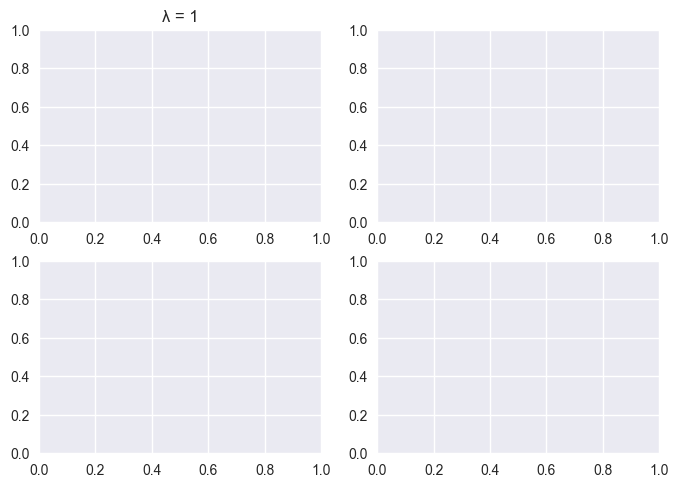

In [5]:
poisson_distribution()